/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


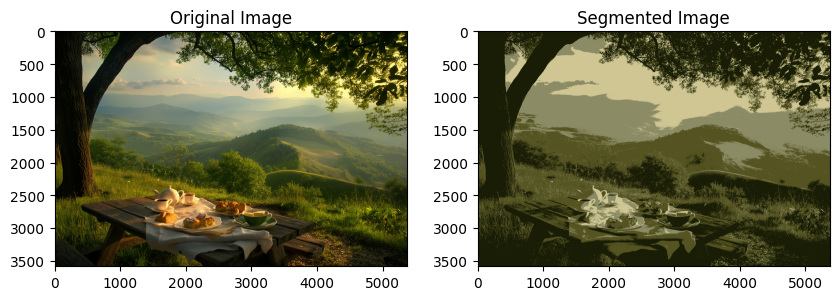

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path to the image
image_path = '/content/picnic.jpeg'  # Replace with the path to your image

def segment_image(image_path, k=4):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)

    # Replace pixel values with their center value (for segmentation)
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    segmented_image = centers[labels.flatten()]

    # Reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image, labels, centers



# Segment the image
segmented_image, labels, centers = segment_image(image_path, k=4)

# Plot the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(121)
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


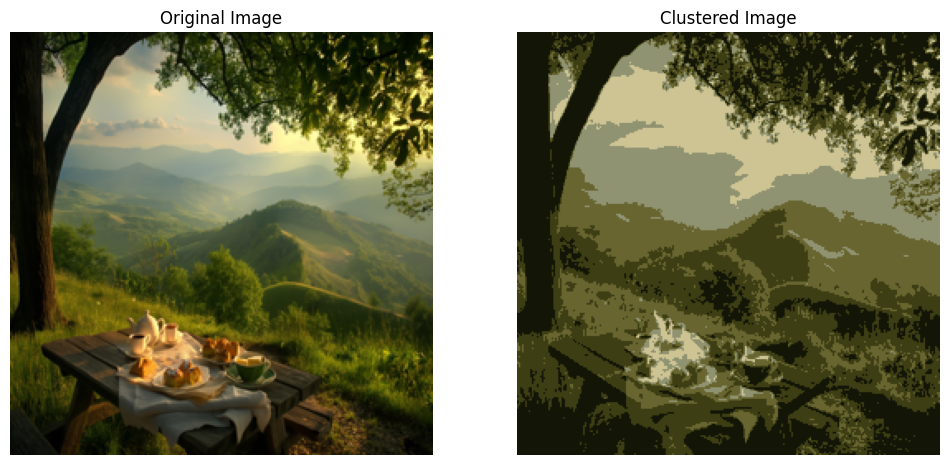

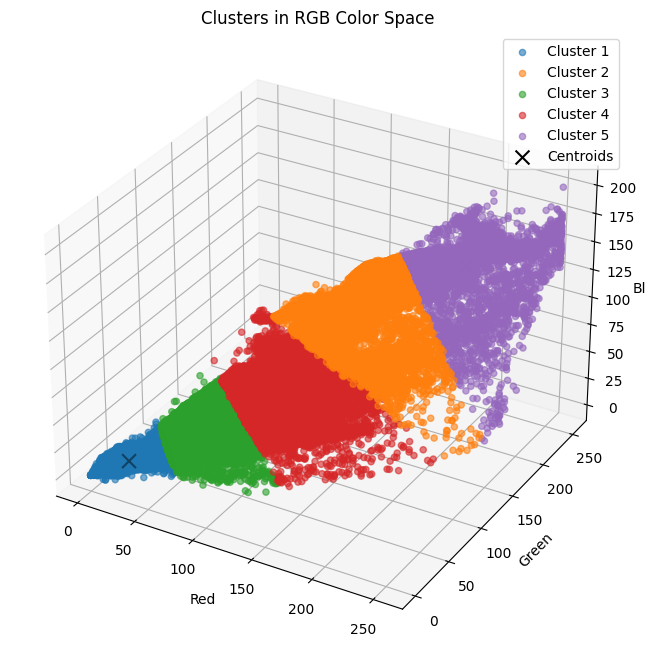

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# Load the image
image_path = '/content/picnic.jpeg'  # Provide the path to your image
original_image = Image.open(image_path)
original_image = original_image.resize((256, 256))  # Resize for faster computation
image_np = np.array(original_image)

# Reshape the image to a 2D array of pixels
pixels = image_np.reshape(-1, 3)

# Apply K-Means clustering
n_clusters = 5  # You can change the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pixels)
clustered_pixels = kmeans.cluster_centers_[kmeans.labels_]

# Reshape the clustered pixels back to the original image shape
clustered_image = clustered_pixels.reshape(image_np.shape).astype(np.uint8)

# Plot the original and clustered images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(clustered_image)
ax[1].set_title('Clustered Image')
ax[1].axis('off')

plt.show()

# Plot the clusters in 3D color space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for i in range(n_clusters):
    cluster = pixels[kmeans.labels_ == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], label=f'Cluster {i+1}', alpha=0.6)

# Plot the cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           color='black', marker='x', s=100, label='Centroids')

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Clusters in RGB Color Space')
ax.legend()
plt.show()
